In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/saipranaychitneni/Documents/LetsUpgrade/Assignments/Day 25 Navie Bayies /titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:

data.drop('Cabin', axis=1, inplace=True)

In [7]:
data.shape

(891, 11)

In [8]:
data.Embarked.value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
data.Embarked.fillna(value='S',inplace=True)


In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [14]:
data.Age.fillna(data.Age.mean(), inplace = True)

In [15]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
data['Fare']= np.round(data['Fare'])

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,8.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0,S


In [21]:
data.drop(['PassengerId','Name','Ticket'],axis = 1, inplace = True)

In [23]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.0,S
1,1,1,female,38.0,1,0,71.0,C
2,1,3,female,26.0,0,0,8.0,S
3,1,1,female,35.0,1,0,53.0,S
4,0,3,male,35.0,0,0,8.0,S


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [27]:
data['Sex']= le.fit_transform(data['Sex'])
data['Embarked']= le.fit_transform(data['Embarked'])

In [28]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.0,2
1,1,1,0,38.0,1,0,71.0,0
2,1,3,0,26.0,0,0,8.0,2
3,1,1,0,35.0,1,0,53.0,2
4,0,3,1,35.0,0,0,8.0,2


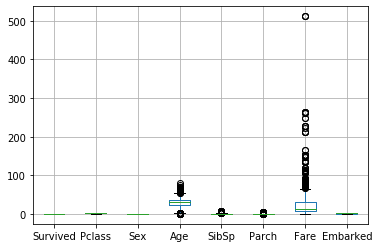

In [29]:
data.boxplot()

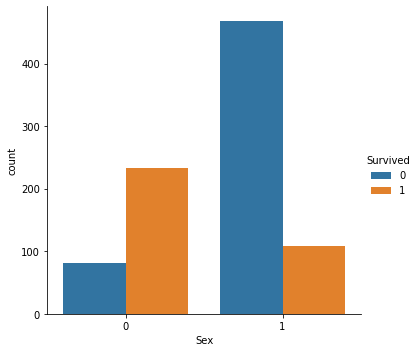

In [31]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = data)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import *
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
def prediction(col):
    clf = BernoulliNB()
    
    for i in col:
        x= data.drop([i],axis = 1)
        print(" New ")
        print(f" The Dependent variable is {i} & all the remaining are independent variables")
        print("x : \n", x.head())
        y = data[i]
        print("y : \n", y.head())
              
        x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
        model = clf.fit(x_train,y_train)
        pred = model.predict(x_test)
              
        print("Accuracy for {i} : ", accuracy_score(y_test,pred , normalize = True))
        print("Confusion matric for {i} : ", confusion_matrix(y_test, pred))
    
column = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked']
prediction(column)

 New 
 The Dependent variable is Survived & all the remaining are independent variables
x : 
    Pclass  Sex   Age  SibSp  Parch  Fare  Embarked
0       3    1  22.0      1      0   7.0         2
1       1    0  38.0      1      0  71.0         0
2       3    0  26.0      0      0   8.0         2
3       1    0  35.0      1      0  53.0         2
4       3    1  35.0      0      0   8.0         2
y : 
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
Accuracy for {i} :  0.7835820895522388
Confusion matric for {i} :  [[137  31]
 [ 27  73]]
 New 
 The Dependent variable is Pclass & all the remaining are independent variables
x : 
    Survived  Sex   Age  SibSp  Parch  Fare  Embarked
0         0    1  22.0      1      0   7.0         2
1         1    0  38.0      1      0  71.0         0
2         1    0  26.0      0      0   8.0         2
3         1    0  35.0      1      0  53.0         2
4         0    1  35.0      0      0   8.0         2
y : 
 0    3
1    1
2    3
3  

In [42]:
value = {'Dependent Variable': ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked'],
         'Accuracy Score': [0.7835,0.5932,0.7835,0.6791,0.7425,0.6977],
         'Total ':[268,268,268,268,268,268],
         'Correct Prediction':[210,159,210,182,199,187],
         'Incorrect Prediction':[58,109,58,86,69,81]}
value = pd.DataFrame(value)
value

,Dependent Variable,Accuracy Score,Total,Correct Prediction,Incorrect Prediction
0,Survived,0.7835,268,210,58
1,Pclass,0.5932,268,159,109
2,Sex,0.7835,268,210,58
3,SibSp,0.6791,268,182,86
4,Parch,0.7425,268,199,69
5,Embarked,0.6977,268,187,81


#The Survived Column and Gender column has same accuracy score
Pclass has the least accuracy